## 1. Opis zbioru i typy danych, wstępne przetwarzanie danych

### Opis zbioru danych

Zbiór danych zawiera informacje o 392 samochodach produkowanych w latach 70. i 80. XX wieku. **Celem analizy jest zrozumienie od czego zależy bardziej ekonomiczne zużycie paliwa (mpg)? Czy da się przewidzieć zużycie paliwa na podstawie danych ze zbioru ?**

#### Zmienne objaśniające (cechy):
- **cylinders** – liczba cylindrów silnika (od 4 do 8)
- **displacement** – objętość skokowa silnika (w calach sześciennych)
- **horsepower** – moc silnika (w koniach mechanicznych)
- **weight** – masa pojazdu (w funtach)
- **acceleration** – czas przyspieszenia od 0 do 60 mph (w sekundach)
- **year** – rok produkcji (dwie ostatnie cyfry, np. 70 = 1970)
- **origin** – kraj produkcji:
  - 1 – USA  
  - 2 – Europa  
  - 3 – Japonia
- **name** – nazwa samochodu (np. chevrolet chevelle malibu)

#### Rozmiar zbioru:
- **Liczba obserwacji**: 392
- **Liczba zmiennych**: 9 (w tym jedna tekstowa: name)

In [27]:
# importowanie bibliotek

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [29]:
# wczytanie danych

df = pd.read_csv('../data/cars.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
# rozmiar danych

print(f"Liczba wierszy: {df.shape[0]}")
print(f"Liczba kolumn: {df.shape[1]}")

Liczba wierszy: 392
Liczba kolumn: 9


In [31]:
# tabela z typami, unikalnymi wartościami i brakami

summary = pd.DataFrame({
    'Typ danych': df.dtypes,
    'Liczba unikalnych': df.nunique(),
    'Liczba braków': df.isna().sum()
})

summary

,Typ danych,Liczba unikalnych,Liczba braków
mpg,float64,127,0
cylinders,int64,5,0
displacement,float64,81,0
horsepower,int64,93,0
weight,int64,346,0
acceleration,float64,95,0
year,int64,13,0
origin,int64,3,0
name,object,301,0


In [32]:
# ststystyki cech liczbowych

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [33]:
# kolumny w zbiorze danych

print("Kolumny w zbiorze danych:")
print(df.columns.tolist())

Kolumny w zbiorze danych:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


In [34]:
# liczba unikalnych wartości dla każdej kolumny

print("Liczba unikalnych wartości w każdej kolumnie:")
print(df.nunique())

Liczba unikalnych wartości w każdej kolumnie:
mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
year             13
origin            3
name            301
dtype: int64


In [35]:
# Unikalne wartości dla kolumny cylinders

print("Unikalne wartości w kolumnie 'cylinders':")
print(df['cylinders'].value_counts().sort_index())

Unikalne wartości w kolumnie 'cylinders':
cylinders
3      4
4    199
5      3
6     83
8    103
Name: count, dtype: int64


In [36]:
# filtrowanie aut z 3 lub 5 cylindrami
df_cyl_3_5 = df[df['cylinders'].isin([3, 5])]

# podgląd wyników
df_cyl_3_5

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
70,19.0,3,70.0,97,2330,13.5,72,3,mazda rx2 coupe
110,18.0,3,70.0,90,2124,13.5,73,3,maxda rx3
241,21.5,3,80.0,110,2720,13.5,77,3,mazda rx-4
272,20.3,5,131.0,103,2830,15.9,78,2,audi 5000
295,25.4,5,183.0,77,3530,20.1,79,2,mercedes benz 300d
325,36.4,5,121.0,67,2950,19.9,80,2,audi 5000s (diesel)
331,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs


In [37]:
# dane bez wartości cylinders==3
# usunięcie aut z 3 cylindrami

df_out_3 = df[df['cylinders'] != 3]

# reset indeksu po usunięciu (aktualizacja indeksów)
df_out_3.reset_index(drop=True, inplace=True)
df_raw = df_out_3

print("Nowy rozmiar zbioru:", df_raw.shape)

Nowy rozmiar zbioru: (388, 9)


Samochody z 3 cylindrami posiadaja nietypowe parametry, objętość skokowa (displacement) jest nienaturalnie niska, natomiast moc jak na tak niska pojemność jest za wykoka. **Samochody z 3 cylindrami zostana usuniete ze zbioru danych.**

In [38]:
# Zapisanie wstępnie przetworzonych danych do pliku

df_raw.to_csv('../data/cars_preprocessed.csv', index=False)

## 2. Analiza rozkładów zmiennych liczbowych.

Wybieramy kolumny numeryczne (bez year, origin, name)

- year zawiera tylko kilkanaście wartości całkowitych i reprezentuje rok produkcji, co czyni ją zmienną dyskretną
- origin to zmienna kategoryczna (1 = USA, 2 = Europa, 3 = Japonia)
- name to zmienna tekstowa (opisowa) z wieloma unikalnymi wartościami — nie nadaje się do analizy rozkładu.

W analizie rozkładów skupiamy się wyłącznie na typowo liczbowych cechach ciągłych, takich jak: mpg, displacement, horsepower, weight, acceleration.

### Histogramy z liniami średniej, mediany, odchylenia standardowego

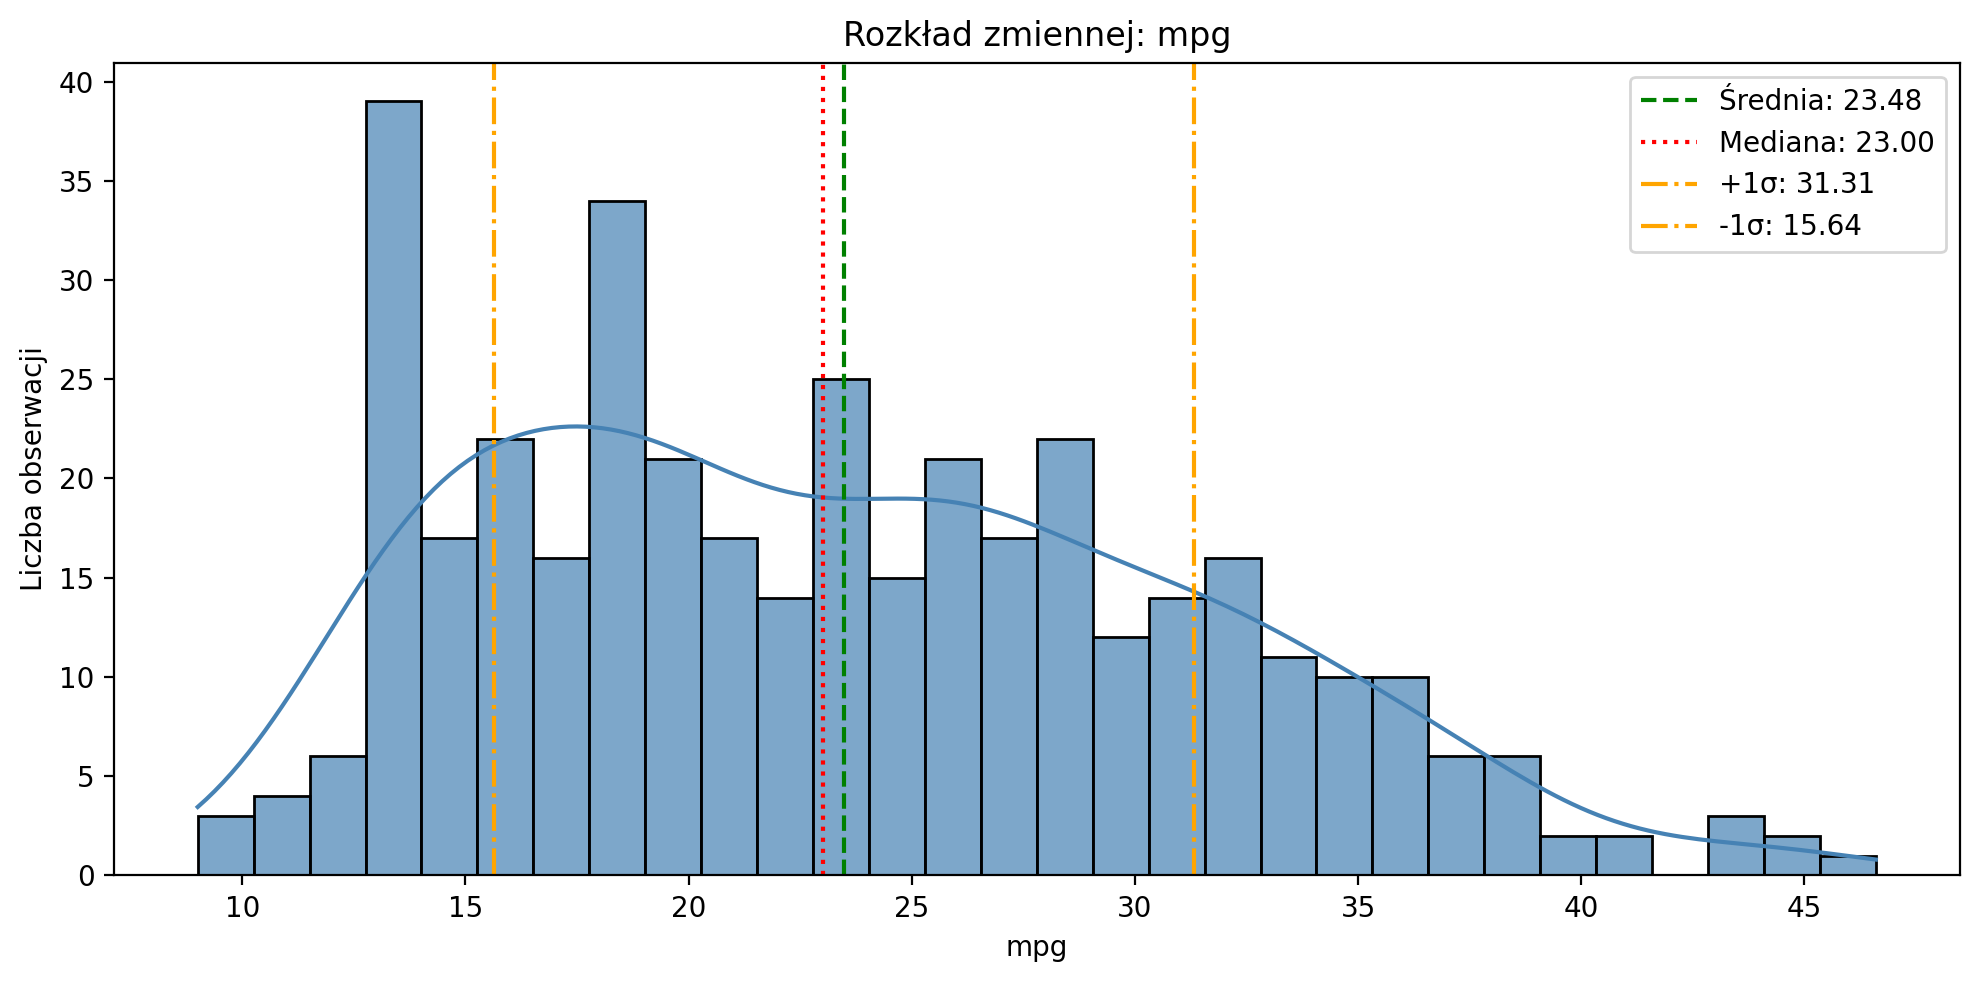

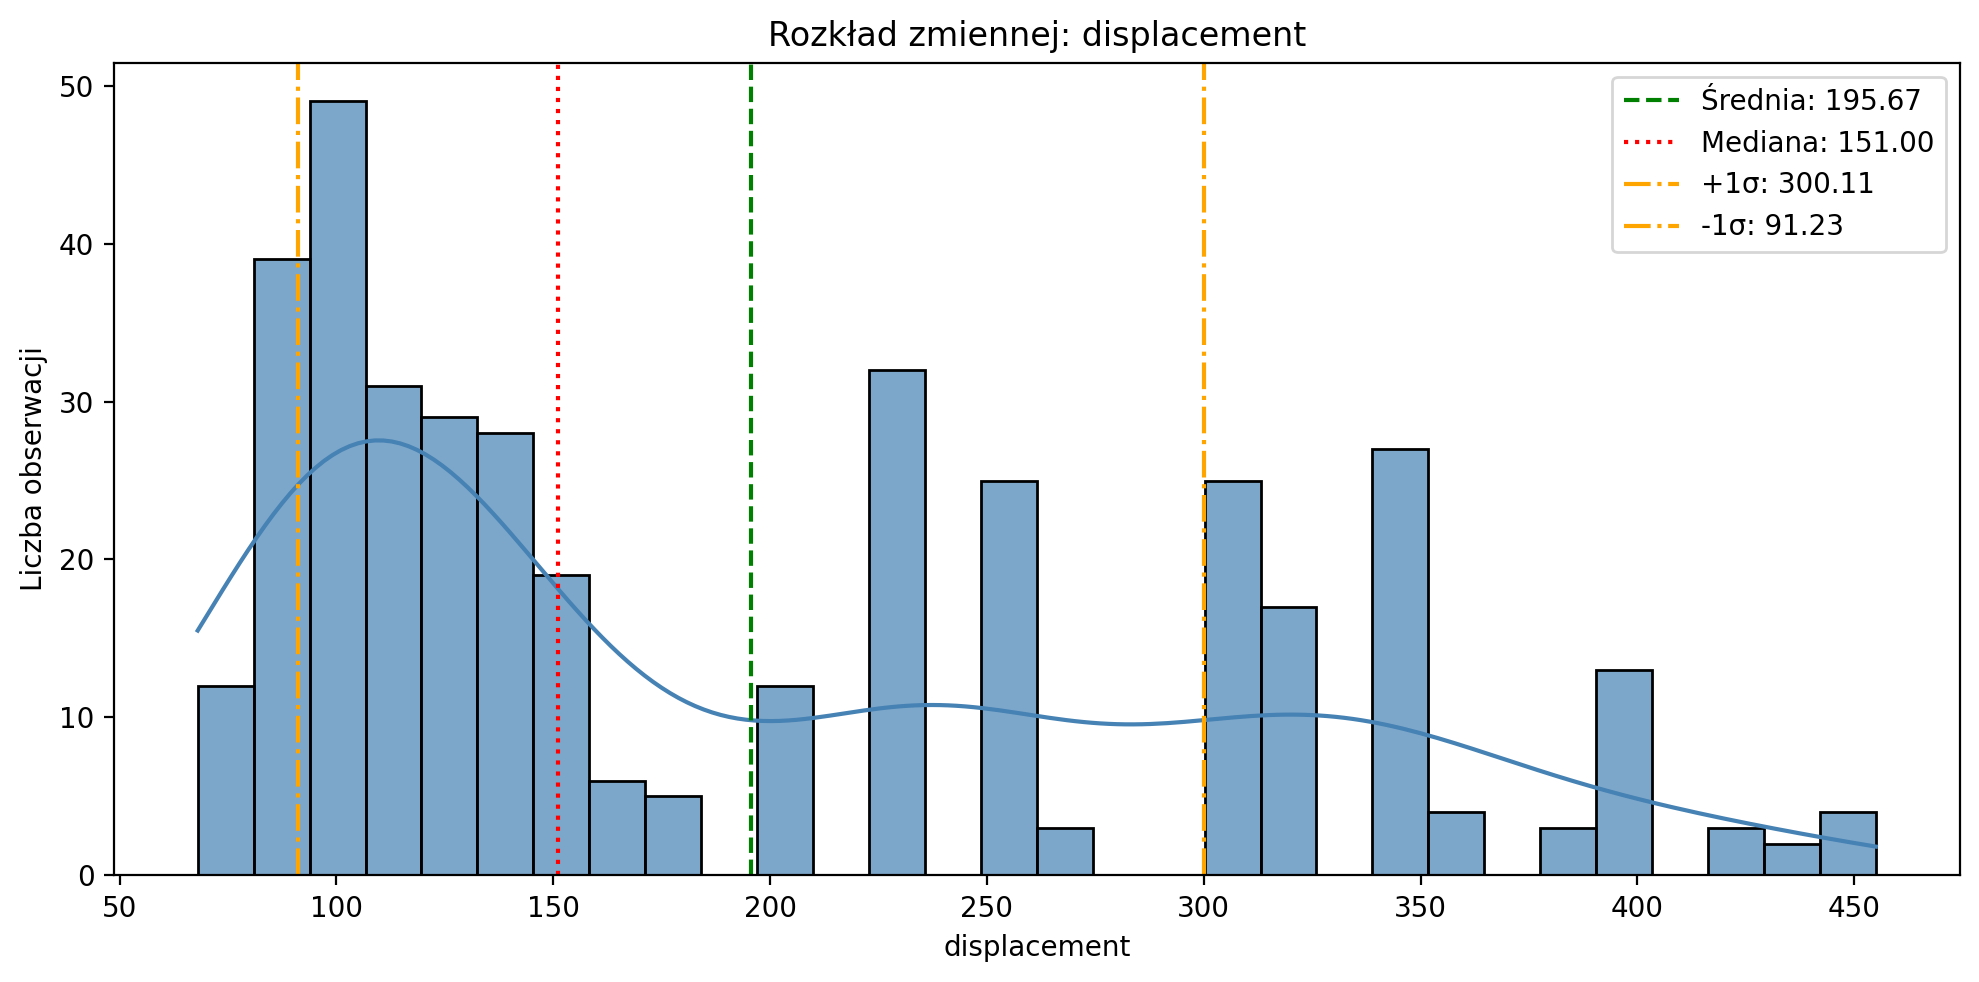

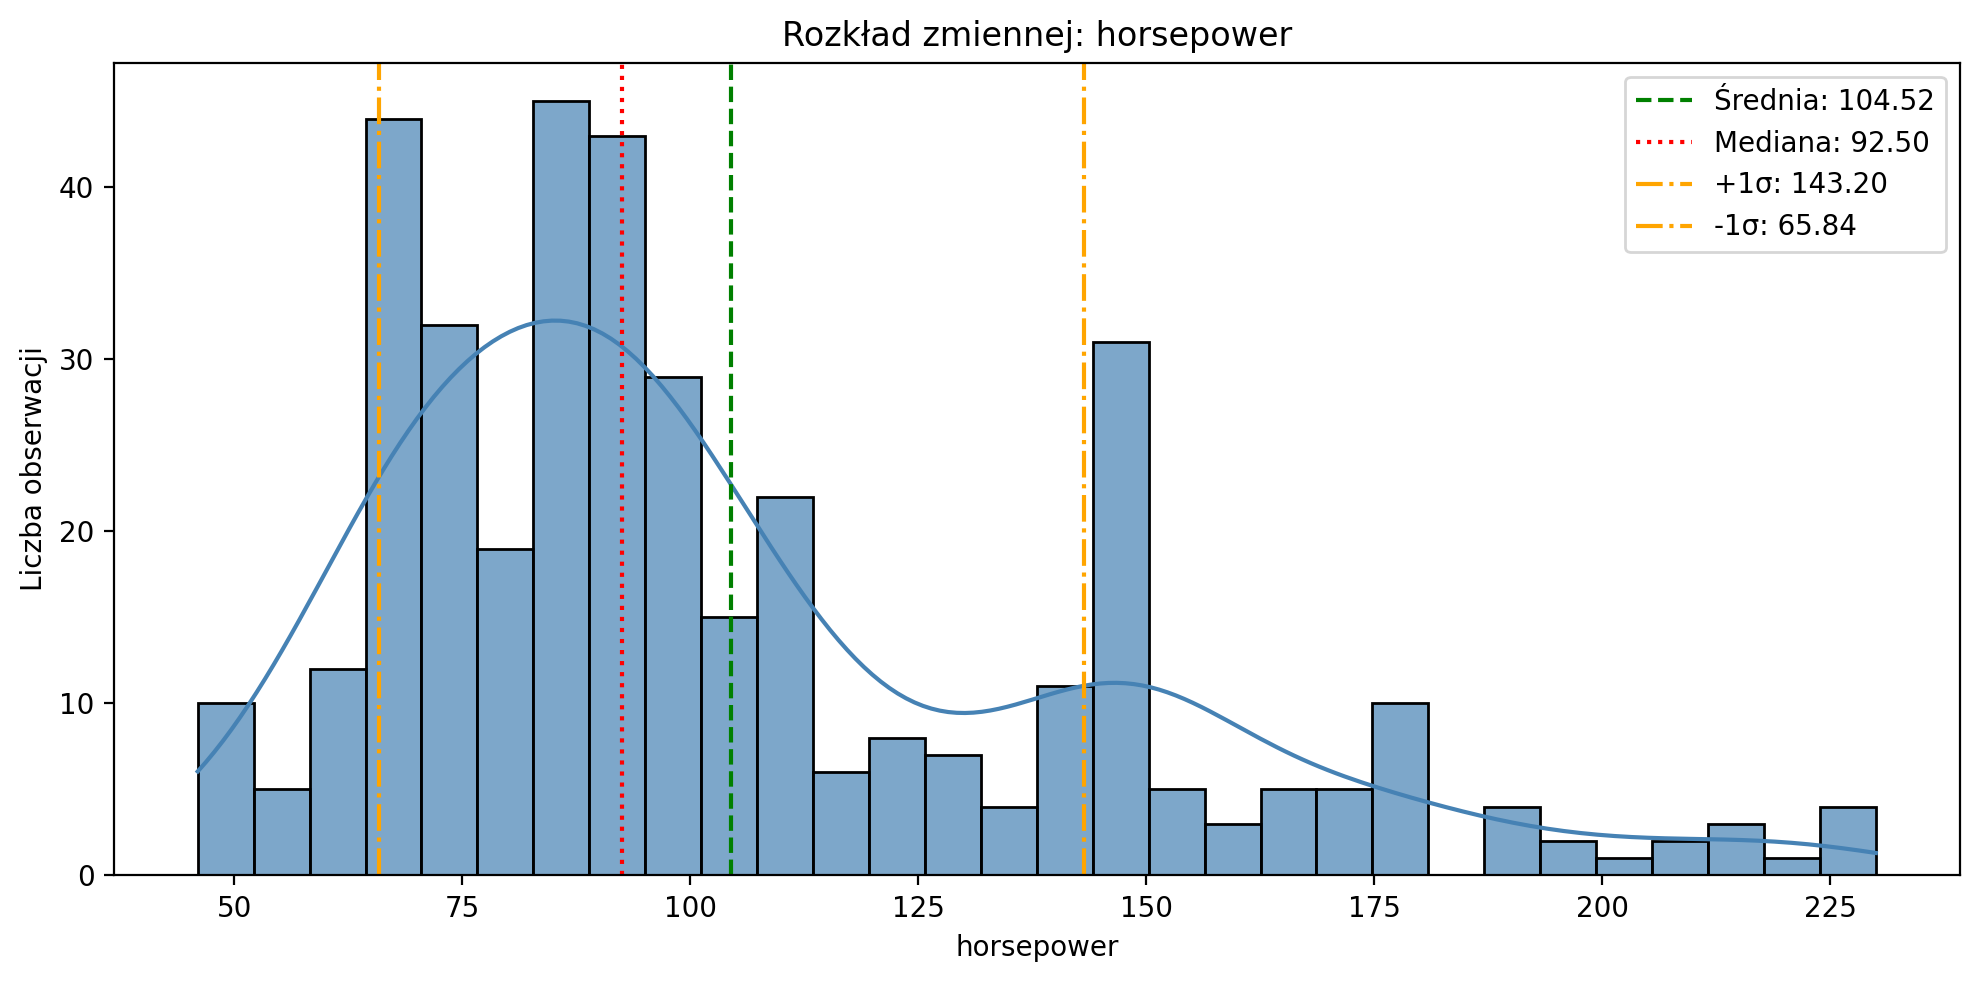

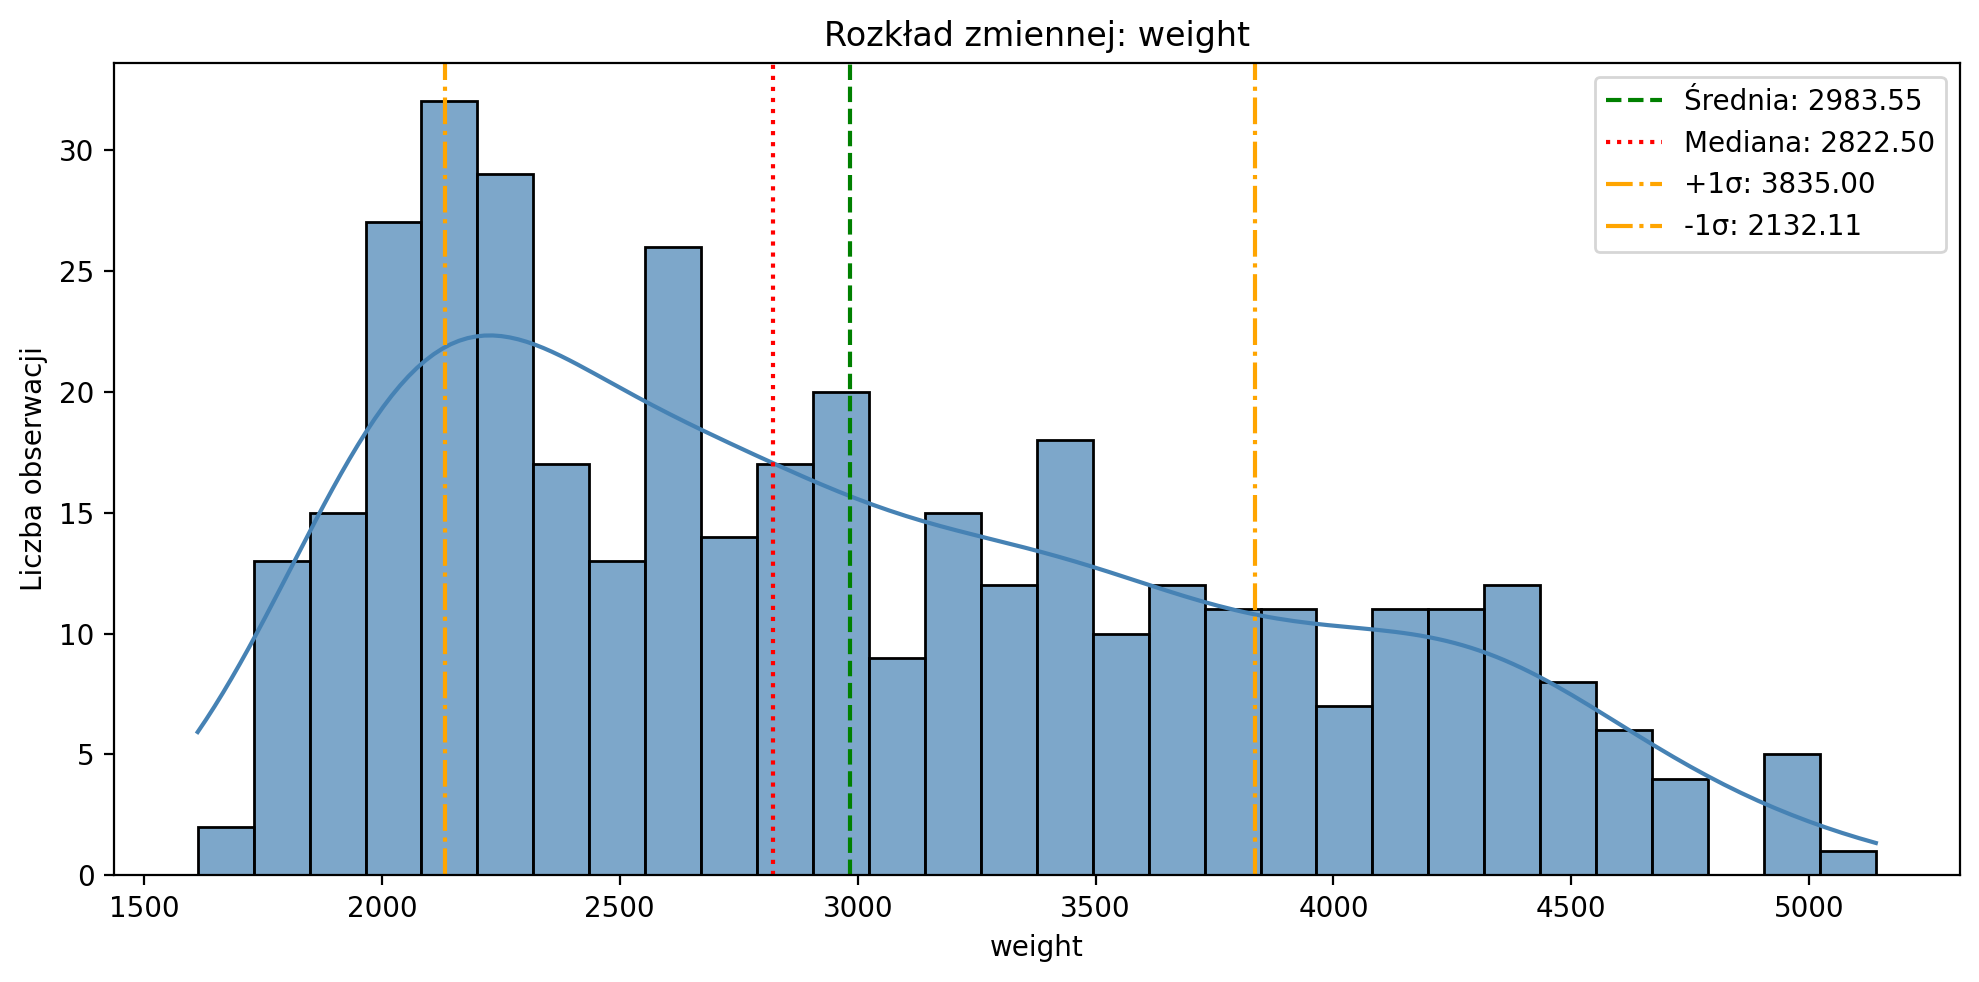

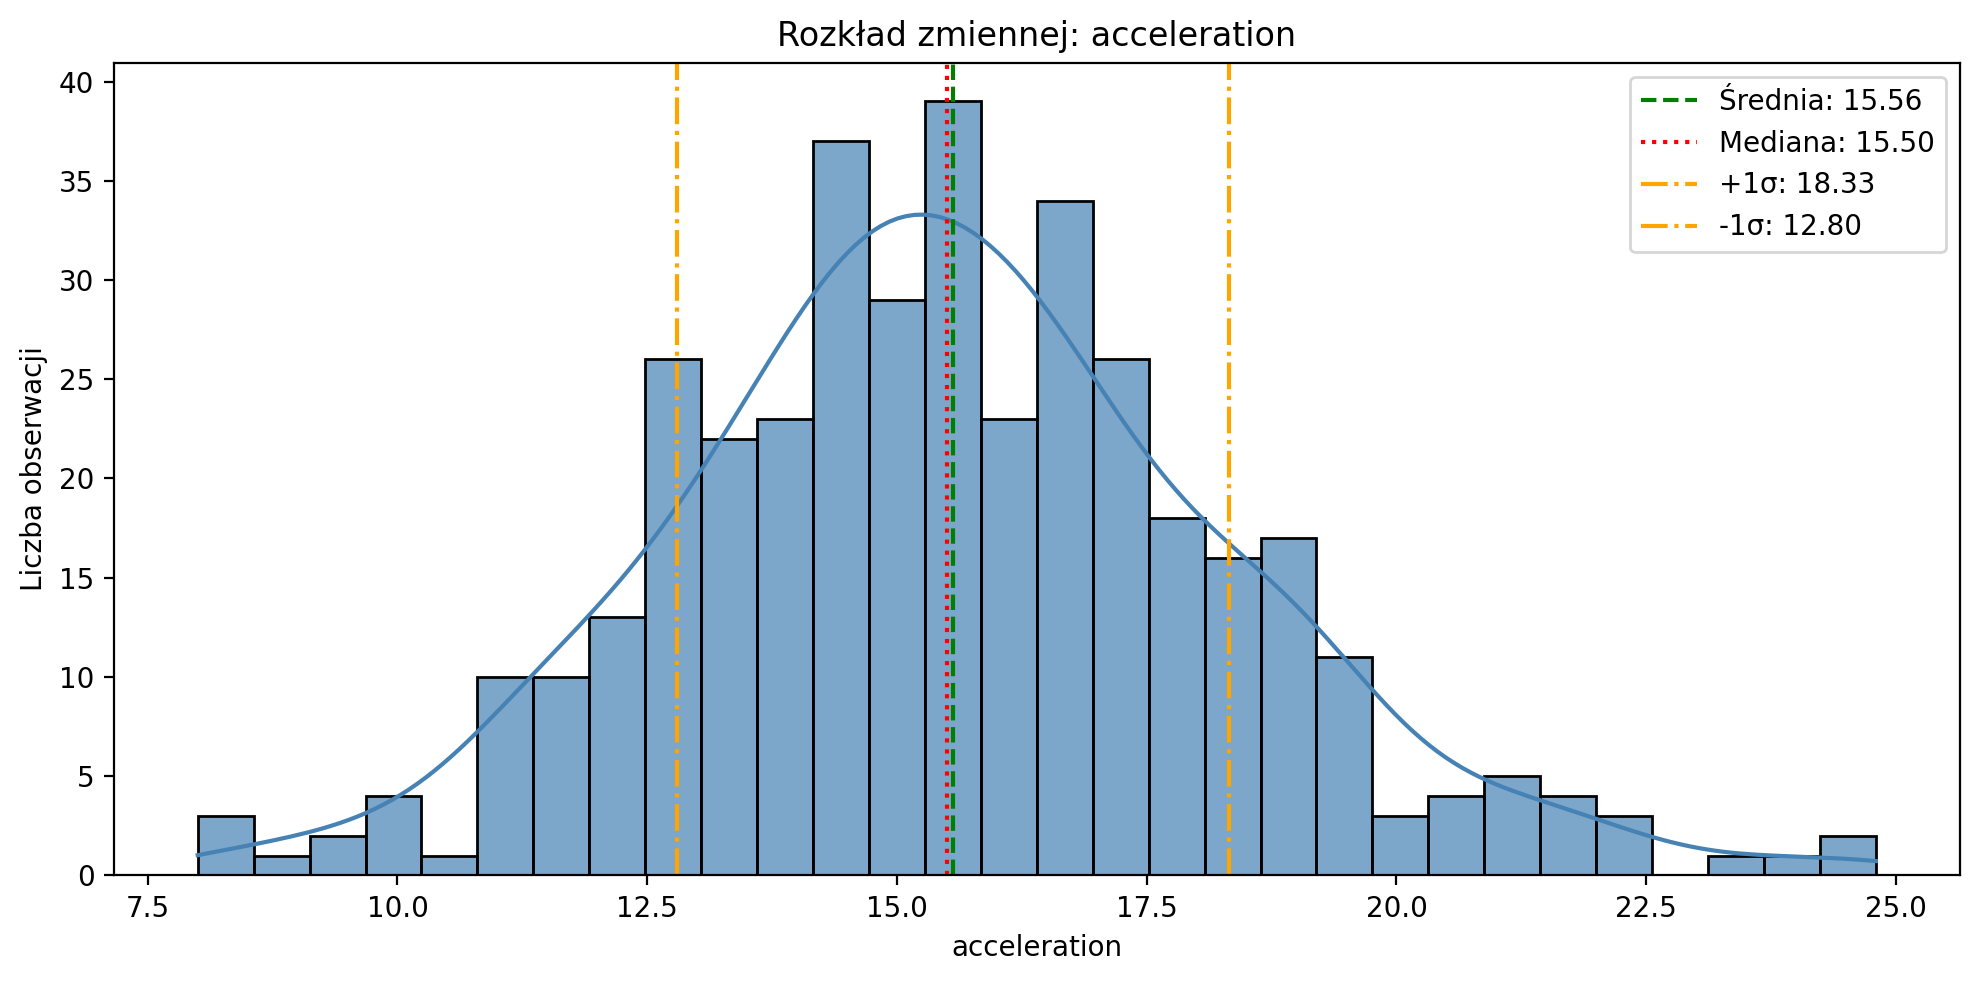

In [40]:
# lista kolumn numerycznych do analizy
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# funkcja rysująca histogram z oznaczeniem średniej, mediany i odchyleń
def plot_histogram_with_stats(data, column):
    values = data[column].dropna()
    mean_val = values.mean()
    median_val = values.median()
    std_val = values.std()

    plt.figure(figsize=(10, 5))
    sns.histplot(values, kde=True, color='steelblue', bins=30, alpha=0.7)

    # linie pomocnicze
    plt.axvline(mean_val, linestyle='dashed', color='green', label=f'Średnia: {mean_val:.2f}')
    plt.axvline(median_val, linestyle='dotted', color='red', label=f'Mediana: {median_val:.2f}')
    plt.axvline(mean_val + std_val, linestyle='dashdot', color='orange', label=f'+1σ: {(mean_val + std_val):.2f}')
    plt.axvline(mean_val - std_val, linestyle='dashdot', color='orange', label=f'-1σ: {(mean_val - std_val):.2f}')

    plt.title(f'Rozkład zmiennej: {column}')
    plt.xlabel(column)
    plt.ylabel('Liczba obserwacji')
    plt.legend()
    plt.tight_layout()
    plt.show()

# pętla: generowanie wykresów dla każdej cechy numerycznej
for col in numeric_cols:
    plot_histogram_with_stats(df_raw, col)

### Boxploty – wizualizacja outlierów

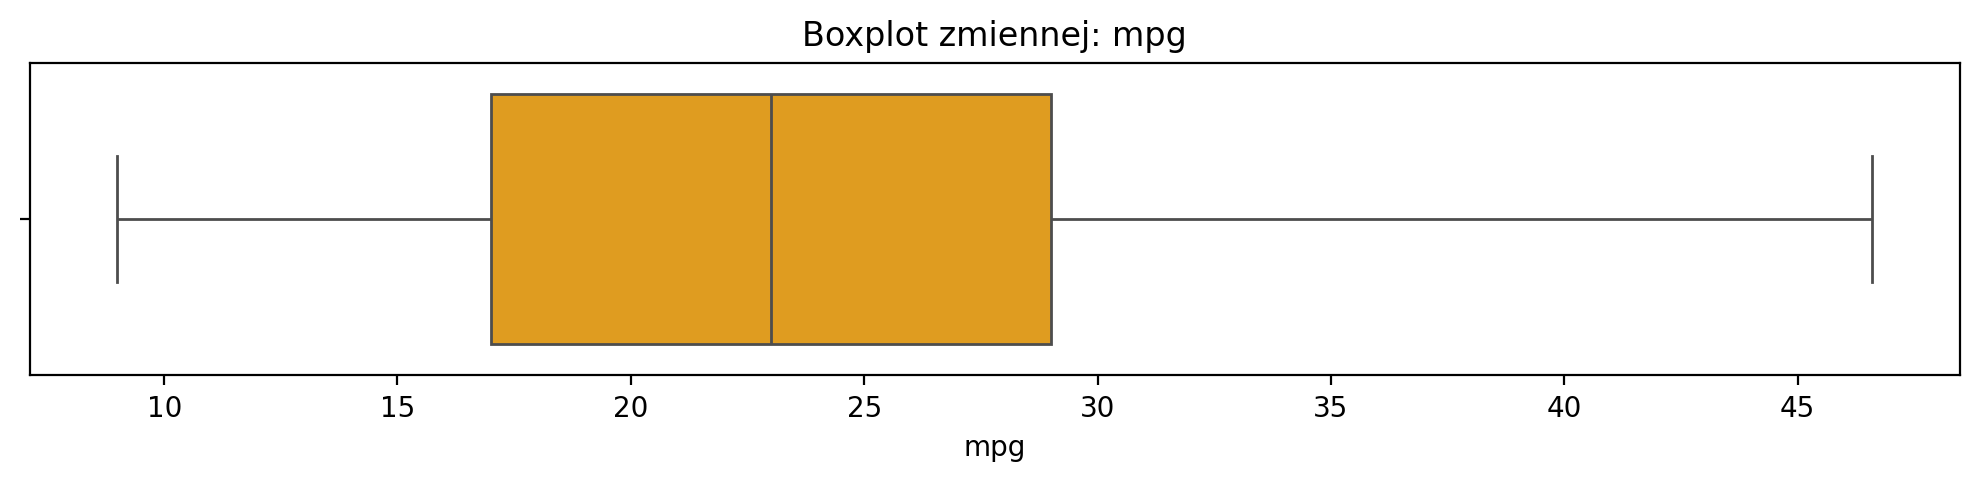

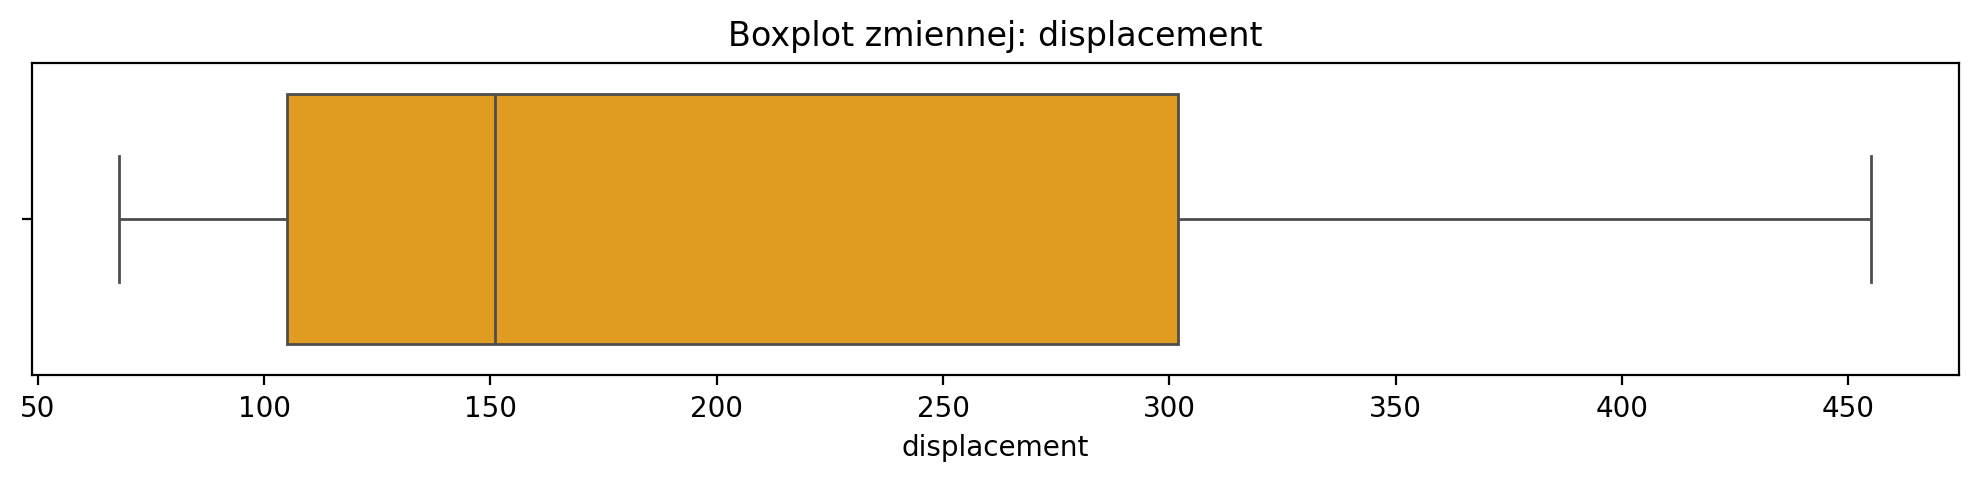

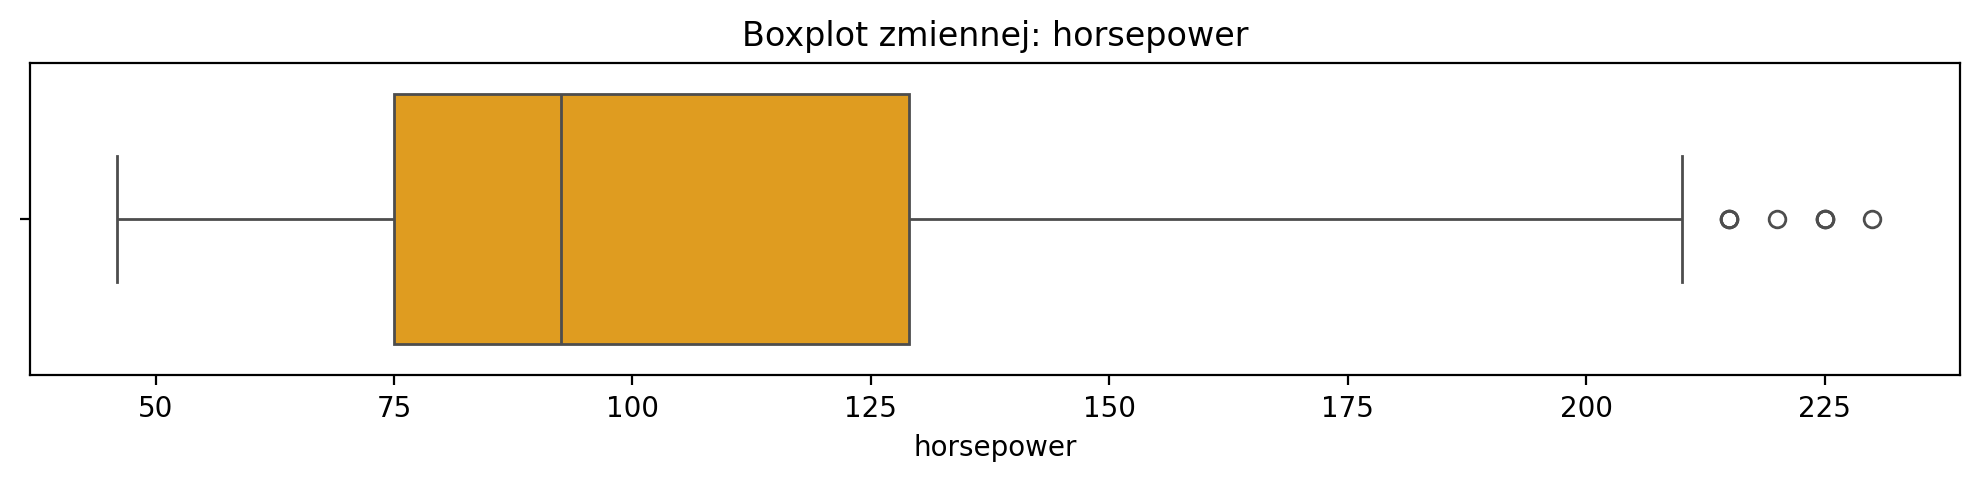

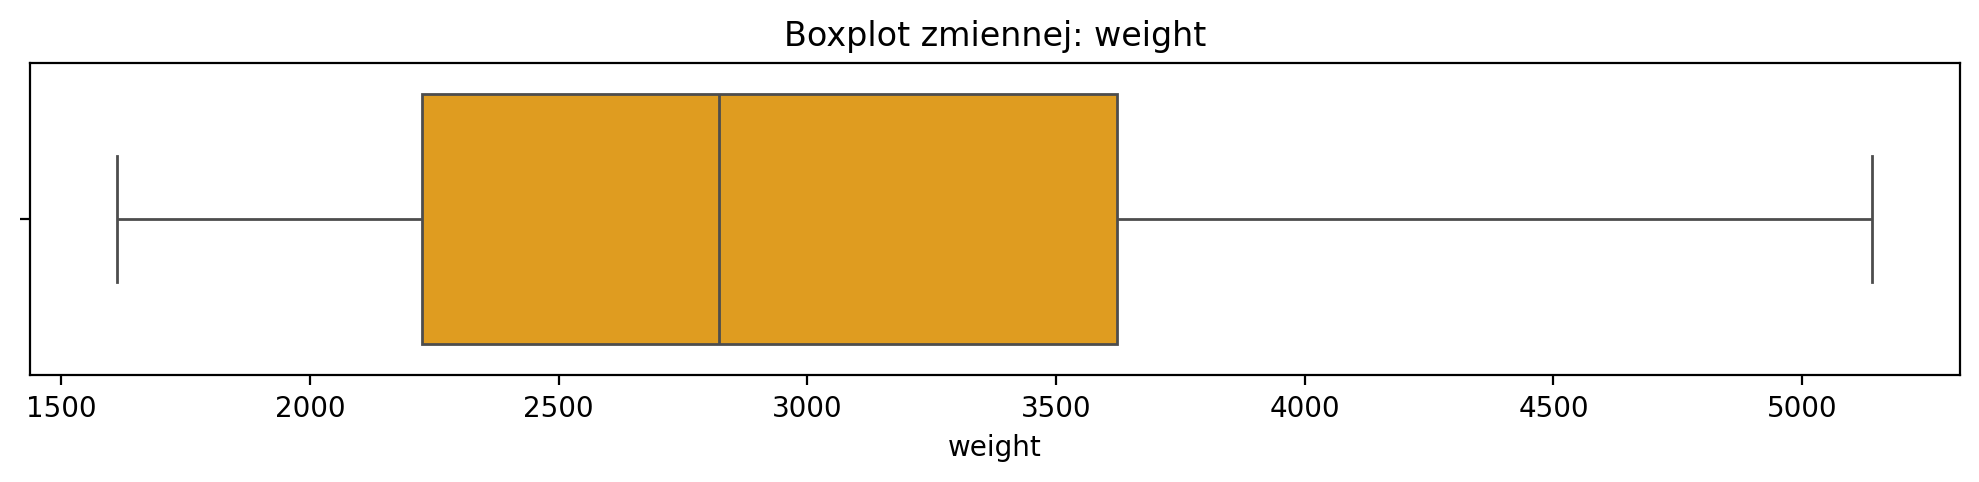

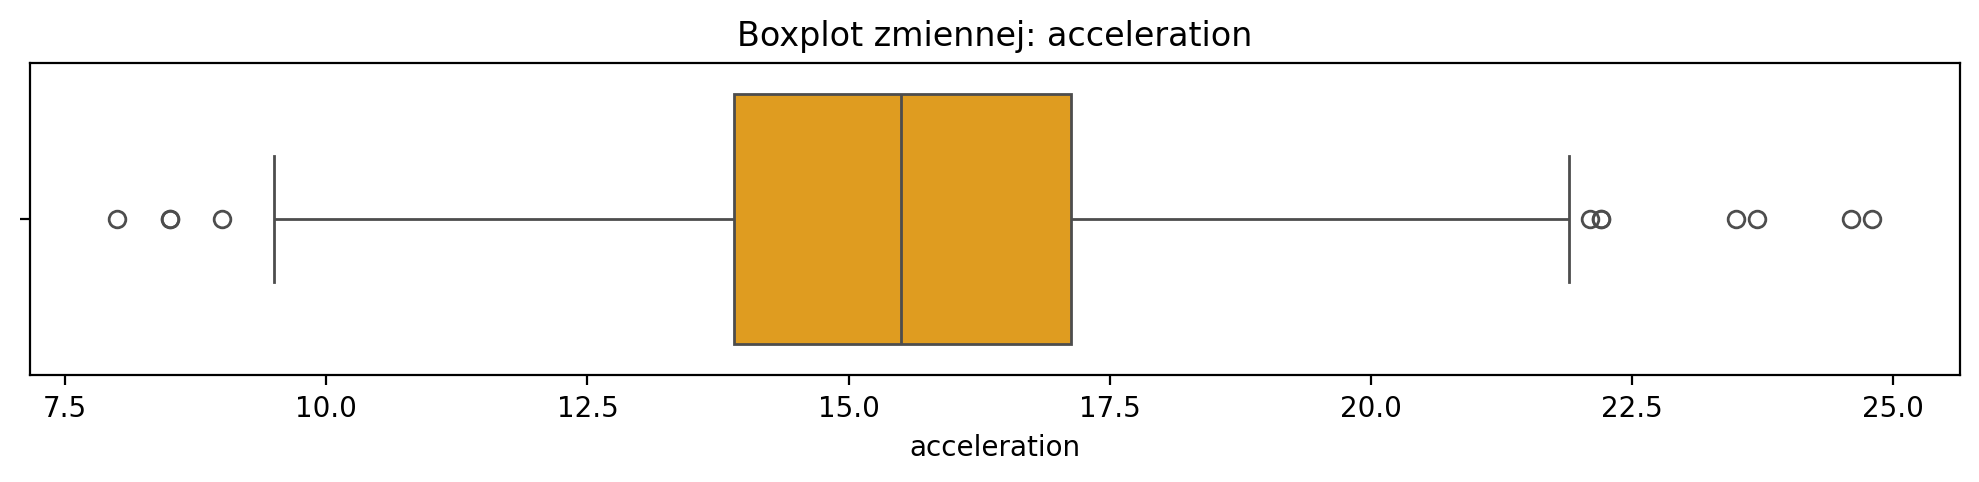

In [41]:
# Funkcja rysująca boxplot z tytułem i opisem
def plot_boxplot(data, column):
    plt.figure(figsize=(10, 2.5))
    sns.boxplot(x=data[column], color='orange')
    plt.title(f'Boxplot zmiennej: {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

# Pętla: generowanie boxplotów dla każdej cechy numerycznej
for col in numeric_cols:
    plot_boxplot(df_raw, col)

# 2. Przygotowanie zbioru danych do analizy przy pomocy uczenia maszynowego

Na potrzeby uczenia maszynowego przygotuję 4 typy zbiorów danych:

2.1. Dane kategoryczne zostaną potraktowane jako liczbowe, kolumna 'names' nie bierze udziału w ML

2.2. Dane kategoryczne 'origin' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

2.3. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

2.4. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' zostaje rozpisana na słownik i bierze udział w ML  (taka namiastka LLM, to jest dobry moment na uśmiech)


Dla każdego przypadku zmienne odstające (outliers) zostaną osobno określone.



# 2.1 Dane kategoryczne potraktowane jako liczbowe.

Wykorzystanie metody z Q1, Q3, IQR * 1.5

Kolumna 'names' nie bierze udziału w ML, ale pozostaje w danych

In [43]:
# wczytanie danych z pliku
df = pd.read_csv('../data/cars_preprocessed.csv')
df.shape

(388, 9)

In [44]:
# w DataFrame df_outliers zawarte są wartości bool wskazujące na wykrycie outliers
# nazwy kolumn analogicznie jak w danych źródłowych
df_outliers = pd.DataFrame()
df_numeric = df.iloc[:, 0:8]    # w danych numerycznych pomijam kolumnę names 

for col in df_numeric.columns:
    # obliczenie Q1, Q3, IQR
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # wykrycie outliers
    outliers = (df_numeric[col] < (Q1 - 1.5 * IQR)) | (df_numeric[col] > (Q3 + 1.5 * IQR))
    
    # dodanie kolumny do DataFrame df_outliers
    df_outliers[col] = outliers     # zawartość pętli for napisał czat :)

df_outliers['is_outlier'] = df_outliers.any(axis=1)

df_numeric.shape
df_outliers.shape
df_outliers.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,is_outlier
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [45]:
# sprawdzenie ilości wykrytych outliers
df_outliers['is_outlier'].sum()

np.int64(17)

W tym przypadku zbiorze 'cars_preprocessed.csv' wykryto 17 wartości odstających (outliers).

In [46]:
# usunięcie outliers z danych
df_no_outl = df[~df_outliers['is_outlier']].copy()
df_no_outl.shape

(371, 9)

In [47]:
# zapisanie danych do pliku
df_no_outl.to_csv('../data/cars_4_ML_no_dummy_cleared.csv', index=False)

## 2.2. Dane kategoryczne 'origin' rozdzielone (dummies), reszta danych jako dane liczbowe

Kolumna 'names' nie bierze udziału w ML

In [48]:
# wczytanie danych z pliku
df = pd.read_csv('../data/cars_preprocessed.csv')

In [49]:
# przygotowanie danych, rozpisanie 'origin' jako dummies
df_origin_dummy = pd.get_dummies(df['origin'], prefix='origin')
df_dummy = pd.concat([df, df_origin_dummy], axis=1)
df_dummy = df_dummy.drop(columns=['origin'])  # usunięcie kolumny 'origin'
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           388 non-null    float64
 1   cylinders     388 non-null    int64  
 2   displacement  388 non-null    float64
 3   horsepower    388 non-null    int64  
 4   weight        388 non-null    int64  
 5   acceleration  388 non-null    float64
 6   year          388 non-null    int64  
 7   name          388 non-null    object 
 8   origin_1      388 non-null    bool   
 9   origin_2      388 non-null    bool   
 10  origin_3      388 non-null    bool   
dtypes: bool(3), float64(3), int64(4), object(1)
memory usage: 25.5+ KB


Wykrywanie wartości odstających (outliers). Dla każdej kategorii w 'origin' dane odstające są osobno sa wykrywane.

Wykorzystałem metodę z Q1, Q3, IQR * 1.5

In [50]:
# w DataFrame df_outliers zawarte są wartości bool wskazujące na wykrycie outliers
# nazwy kolumn analogicznie jak w danych źródłowych z uwzględnieniem kategorii, dla której zostały policzone
#  w danych pomijam kolumnę names 

df_outliers = pd.DataFrame()
df_numeric = df_dummy.iloc[:, 0:7]    
df_categorical = df_dummy.iloc[:, 8:]  # 'origin' jako dane kategoryczne

for col_num in df_numeric.columns:
    for col_cat in df_categorical.columns:
        filter = df_dummy[col_cat] == 1 
        Q1 = df_dummy.loc[filter, col_num].quantile(0.25)
        Q3 = df_dummy.loc[filter, col_num].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df_dummy[col_num] < (Q1 - 1.5 * IQR )) & filter  ) | ((df_dummy[col_num] > (Q3 + 1.5 * IQR)) & filter)
        col_name = col_num+ '_' + col_cat
        df_outliers[col_name] = outliers
        print(col_name, '  ilość outliers:', outliers.sum())

df_outliers['is_outlier'] = df_outliers.any(axis=1)

print('--------------------------------------------------')
print('Łączna ilość wykrytych outliers:', df_outliers['is_outlier'].sum())


mpg_origin_1   ilość outliers: 3
mpg_origin_2   ilość outliers: 5
mpg_origin_3   ilość outliers: 1
cylinders_origin_1   ilość outliers: 0
cylinders_origin_2   ilość outliers: 7
cylinders_origin_3   ilość outliers: 6
displacement_origin_1   ilość outliers: 0
displacement_origin_2   ilość outliers: 4
displacement_origin_3   ilość outliers: 2
horsepower_origin_1   ilość outliers: 0
horsepower_origin_2   ilość outliers: 2
horsepower_origin_3   ilość outliers: 0
weight_origin_1   ilość outliers: 0
weight_origin_2   ilość outliers: 0
weight_origin_3   ilość outliers: 0
acceleration_origin_1   ilość outliers: 0
acceleration_origin_2   ilość outliers: 0
acceleration_origin_3   ilość outliers: 0
year_origin_1   ilość outliers: 0
year_origin_2   ilość outliers: 0
year_origin_3   ilość outliers: 0
--------------------------------------------------
Łączna ilość wykrytych outliers: 22


W tym przypadku zbiorze 'cars_preprocessed.csv' wykryto 22 wartości odstające (outliers).

In [51]:
# usunięcie outliers z danych
df_dummy_no_outl = df_dummy[~df_outliers['is_outlier']].copy()
df_dummy_no_outl.shape

(366, 11)

In [52]:
# zapisanie danych do pliku
df_dummy_no_outl.to_csv('../data/cars_4_ML_dummy_origin_cleared.csv', index=False)

## 2.3. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe.

Kolumna 'names' nie bierze udziału w ML

In [53]:
# wczytanie danych z pliku
df = pd.read_csv('../data/cars_preprocessed.csv')

In [54]:
# przygotowanie danych, rozpisanie 'origin' jako dummies
df_origin_dummy = pd.get_dummies(df['origin'], prefix='origin')
df_cylinders_dummy = pd.get_dummies(df['cylinders'], prefix='cylinders')
df_dummy = pd.concat([df, df_origin_dummy, df_cylinders_dummy], axis=1)
df_dummy = df_dummy.drop(columns=['origin', 'cylinders'])  # usunięcie kolumny 'origin' i 'cylinders'
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           388 non-null    float64
 1   displacement  388 non-null    float64
 2   horsepower    388 non-null    int64  
 3   weight        388 non-null    int64  
 4   acceleration  388 non-null    float64
 5   year          388 non-null    int64  
 6   name          388 non-null    object 
 7   origin_1      388 non-null    bool   
 8   origin_2      388 non-null    bool   
 9   origin_3      388 non-null    bool   
 10  cylinders_4   388 non-null    bool   
 11  cylinders_5   388 non-null    bool   
 12  cylinders_6   388 non-null    bool   
 13  cylinders_8   388 non-null    bool   
dtypes: bool(7), float64(3), int64(3), object(1)
memory usage: 24.0+ KB


Wykrywanie wartości odstających (outliers). Dla każdej kategorii w 'origin' oraz 'cylinders' dane odstające są osobno sa wykrywane.

Wykorzystałem metodę z Q1, Q3, IQR * 1.5

In [55]:
# w DataFrame df_outliers zawarte są wartości bool wskazujące na wykrycie outliers
# nazwy kolumn analogicznie jak w danych źródłowych z uwzględnieniem kategorii, dla której zostały policzone
#  w danych pomijam kolumnę names 

df_outliers = pd.DataFrame()
df_numeric = df_dummy.iloc[:, 0:6]    
df_categorical = df_dummy.iloc[:, 7:]  # 'origin' oraz 'cylinders' jako dane kategoryczne

for col_num in df_numeric.columns:
    for col_cat in df_categorical.columns:
        filter = df_dummy[col_cat] == 1 
        Q1 = df_dummy.loc[filter, col_num].quantile(0.25)
        Q3 = df_dummy.loc[filter, col_num].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df_dummy[col_num] < (Q1 - 1.5 * IQR )) & filter  ) | ((df_dummy[col_num] > (Q3 + 1.5 * IQR)) & filter)
        col_name = col_num+ '_' + col_cat
        df_outliers[col_name] = outliers
        #print(col_name, '  ilość outliers:', outliers.sum())

df_outliers['is_outlier'] = df_outliers.any(axis=1)

print('--------------------------------------------------')
print('Łączna ilość wykrytych outliers:', df_outliers['is_outlier'].sum())


--------------------------------------------------
Łączna ilość wykrytych outliers: 31


W tym przypadku zbiorze 'cars_preprocessed.csv' wykryto 31 wartości odstających (outliers).

In [56]:
# usunięcie outliers z danych
df_dummy_all_no_outl = df_dummy[~df_outliers['is_outlier']].copy()
df_dummy_all_no_outl.shape

(357, 14)

In [57]:
# zapisanie danych do pliku
df_dummy_all_no_outl.to_csv('../data/cars_4_ML_dummy_all_cleared.csv', index=False)

## 2.4. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' zostaje rozpisana na słownik i bierze udział w ML 

Uzupełnienie danych o słownik na podstawie kolumny 'names'. Dane słownikowe w postaci kategorii (dummies).

In [58]:
feature_str_list = []
for i in df_dummy_all_no_outl['name'].tolist():
    i_split = i.split(' ')
    for i1 in i_split:
        feature_str_list = feature_str_list + [i1]
        
feature_set = set(feature_str_list)
print('Ilość unikalnych cech w kolumnie names:', len(feature_set))

df_dummy_all_no_outl_LLM = df_dummy_all_no_outl.copy()
names = df_dummy_all_no_outl['name'].to_numpy(dtype=str).copy()
for feature in feature_set:
    col_name = 'name_' + feature
    #for name in np.nditer(names):
    df_dummy_all_no_outl_LLM[col_name] = np.strings.count(names, feature, start=0, end=None).reshape((-1,))
            
#print(df_dummy_all_no_outl_LLM.info())
#print(df_dummy_all_no_outl_LLM.head())

Ilość unikalnych cech w kolumnie names: 287


/var/folders/zy/r9v_6m7x2nnfwpn0fw97cyb40000gn/T/ipykernel_1937/1667071530.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummy_all_no_outl_LLM[col_name] = np.strings.count(names, feature, start=0, end=None).reshape((-1,))
/var/folders/zy/r9v_6m7x2nnfwpn0fw97cyb40000gn/T/ipykernel_1937/1667071530.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummy_all_no_outl_LLM[col_name] = np.strings.count(names, feature, start=0, end=None).reshape((-1,))
/var/folders/zy/r9v_6m7x2nnfwpn0fw97cyb40000gn/T/ipykernel_1937/166707

In [59]:
# zapisanie danych do pliku
df_dummy_all_no_outl_LLM.to_csv('../data/cars_4_ML_dummy_all_LLM_cleared.csv', index=False)